In [19]:
import pandas as pd
import plotnine as p9
from plotnine import theme, element_text

In [15]:
ev_chargers = pd.read_csv("EV Chargers_Last updated 01-31-2022.csv")
ev_chargers

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Total
0,Alameda,6,70,1671,1583,332,35,3697
1,Alpine,0,0,14,0,0,0,14
2,Amador,0,0,25,6,8,0,39
3,Butte,6,0,41,23,24,0,94
4,Calaveras,0,2,7,0,12,0,21
5,Colusa,0,0,18,2,18,0,38
6,Contra Costa,3,2,600,599,245,2,1451
7,Del Norte,0,0,12,0,17,0,29
8,El Dorado,1,0,124,5,49,0,179
9,Fresno,8,1,574,329,208,13,1133


In [124]:
ev_chargers2 = ev_chargers.drop('Total', axis=1)
ev_chargers2.head()

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast
0,Alameda,6,70,1671,1583,332,35
1,Alpine,0,0,14,0,0,0
2,Amador,0,0,25,6,8,0
3,Butte,6,0,41,23,24,0
4,Calaveras,0,2,7,0,12,0


In [126]:
ev_chargers2 = ev_chargers.drop('Total', axis=1)
ev_chargers2["Public Chargers"] = (ev_chargers2["Public Level 1"] + ev_chargers2["Public Level 2"] + 
                                   ev_chargers2["Public DC Fast"])
ev_chargers2["Private Chargers"] = (ev_chargers2["Shared Private Level 1"] + ev_chargers2["Shared Private Level 2"] + 
                                   ev_chargers2["Shared Private DC Fast"])
ev_chargers2 = ev_chargers2.drop([59])
ev_chargers2.tail()

,County,Public Level 1,Shared Private Level 1,Public Level 2,Shared Private Level 2,Public DC Fast,Shared Private DC Fast,Public Chargers,Private Chargers
54,Tuolumne,0,0,34,6,38,0,72,6
55,Unknown,0,0,0,14,0,0,0,14
56,Ventura,5,0,423,332,126,8,554,340
57,Yolo,12,0,205,127,50,0,267,127
58,Yuba,0,0,25,7,0,0,25,7


In [128]:
charger_list = list(ev_chargers2) 
charger_list.remove('County')
charger_list.remove('Public Chargers')
charger_list.remove('Private Chargers')

ev_df = pd.DataFrame()
for i in range(len(charger_list)):
    placeholder = pd.melt(ev_chargers2, id_vars = ['County'], value_vars = [charger_list[i]])
    ev_df = pd.concat([ev_df, placeholder], ignore_index = True)
    
ev_df

,County,variable,value
0,Alameda,Public Level 1,6
1,Alpine,Public Level 1,0
2,Amador,Public Level 1,0
3,Butte,Public Level 1,6
4,Calaveras,Public Level 1,0
...,...,...,...
349,Tuolumne,Shared Private DC Fast,0
350,Unknown,Shared Private DC Fast,0
351,Ventura,Shared Private DC Fast,8
352,Yolo,Shared Private DC Fast,0


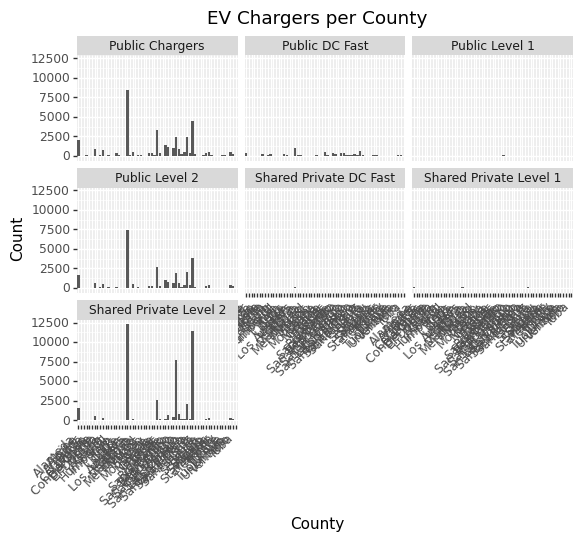

<ggplot: (93582601670)>

In [76]:
(p9.ggplot(ev_df, p9.aes(x = 'County', y = 'value')) 
+ p9.geom_col() 
+ p9.labs(title = "EV Chargers per County", x = "County", y = "Count")
+ theme(axis_text_x=element_text(rotation=45, hjust = 1))
+ p9.facet_wrap('~variable'))

In [89]:
import plotly.express as px

In [141]:
ev_pub = ev_chargers2[["County","Public Level 1", "Public Level 2", "Public DC Fast", "Public Chargers"]]
ev_pub.tail()

,County,Public Level 1,Public Level 2,Public DC Fast,Public Chargers
54,Tuolumne,0,34,38,72
55,Unknown,0,0,0,0
56,Ventura,5,423,126,554
57,Yolo,12,205,50,267
58,Yuba,0,25,0,25


In [142]:
ev_priv = ev_chargers2[["County","Shared Private Level 1", "Shared Private Level 2", "Shared Private DC Fast", 
                       "Private Chargers"]]
ev_priv.head()

,County,Shared Private Level 1,Shared Private Level 2,Shared Private DC Fast,Private Chargers
0,Alameda,70,1583,35,1688
1,Alpine,0,0,0,0
2,Amador,0,6,0,6
3,Butte,0,23,0,23
4,Calaveras,2,0,0,2


In [134]:
px.bar(ev_df, x="County",y=["value"], color="variable", 
       labels={'_value': 'Count'}, title='All EV Chargers per County')

In [136]:
px.bar(ev_pub, x="County",y=["Public Level 1", "Public Level 2", "Public DC Fast"], 
       labels={'value': 'Count'}, title='Public EV Chargers per County')

In [138]:
px.bar(ev_priv, x="County",y=["Shared Private Level 1", "Shared Private Level 2", "Shared Private DC Fast"],
      labels={'value': 'Count'}, title='Private EV Chargers per County')